<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.662364,23.684898,73.679304,-0.000833,148.025734,148.026831,-0.001098
1,0.0,1.0,64.201568,27.048237,56.470120,-0.000633,157.719292,157.720111,-0.000819
2,0.0,2.0,56.740148,70.569067,46.103689,0.000190,183.413095,183.412994,0.000101
3,0.0,3.0,60.377861,84.043301,29.239464,-0.000088,183.660538,183.660706,-0.000168
4,0.0,4.0,76.207569,92.164624,36.765761,-0.000151,215.137803,215.137880,-0.000077
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.376011,51.843355,74.027845,-0.000230,217.246981,217.247045,-0.000064
59996,999.0,56.0,21.235188,28.238064,40.682012,0.000367,100.155630,100.155095,0.000536
59997,999.0,57.0,36.448265,32.984454,96.730319,-0.000640,176.162398,176.162661,-0.000263
59998,999.0,58.0,70.644502,91.242877,92.211844,-0.000322,264.098900,264.099192,-0.000291


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.662364,23.684898,73.679304,-0.000833,148.025734,148.026831,-0.001098
1,0.0,1.0,64.201568,27.048237,56.470120,-0.000633,157.719292,157.720111,-0.000819
2,0.0,2.0,56.740148,70.569067,46.103689,0.000190,183.413095,183.412994,0.000101
3,0.0,3.0,60.377861,84.043301,29.239464,-0.000088,183.660538,183.660706,-0.000168
4,0.0,4.0,76.207569,92.164624,36.765761,-0.000151,215.137803,215.137880,-0.000077
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.376011,51.843355,74.027845,-0.000230,217.246981,217.247045,-0.000064
59996,999.0,56.0,21.235188,28.238064,40.682012,0.000367,100.155630,100.155095,0.000536
59997,999.0,57.0,36.448265,32.984454,96.730319,-0.000640,176.162398,176.162661,-0.000263
59998,999.0,58.0,70.644502,91.242877,92.211844,-0.000322,264.098900,264.099192,-0.000291


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.662364  23.684898  73.679304  ...  148.025734  148.026831 -0.001098
      1.0    64.201568  27.048237  56.470120  ...  157.719292  157.720111 -0.000819
      2.0    56.740148  70.569067  46.103689  ...  183.413095  183.412994  0.000101
      3.0    60.377861  84.043301  29.239464  ...  183.660538  183.660706 -0.000168
      4.0    76.207569  92.164624  36.765761  ...  215.137803  215.137880 -0.000077
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.376011  51.843355  74.027845  ...  217.246981  217.247045 -0.000064
      56.0   21.235188  28.238064  40.682012  ...  100.155630  100.155095  0.000536
      57.0   36.448265  32.984454  96.730319  ...  176.162398  176.162661 -0.000263
      58.0   70.644502  91.242877  92.211844  ...  264.098900  264.099192 -0.000291
      59.0   81.052001  29.357635  46.164900  ...  166.573506  166.574366 -0.000859

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.662364  23.684898  73.679304  ...  148.025734  148.026831 -0.001098
      1.0    64.201568  27.048237  56.470120  ...  157.719292  157.720111 -0.000819
      2.0    56.740148  70.569067  46.103689  ...  183.413095  183.412994  0.000101
      3.0    60.377861  84.043301  29.239464  ...  183.660538  183.660706 -0.000168
      4.0    76.207569  92.164624  36.765761  ...  215.137803  215.137880 -0.000077
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.376011  51.843355  74.027845  ...  217.246981  217.247045 -0.000064
      56.0   21.235188  28.238064  40.682012  ...  100.155630  100.155095  0.000536
      57.0   36.448265  32.984454  96.730319  ...  176.162398  176.162661 -0.000263
      58.0   70.644502  91.242877  92.211844  ...  264.098900  264.099192 -0.000291
      59.0   81.052001  29.357635  46.164900  ...  166.573506  166.574366 -0.000859

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.662364,23.684898,73.679304,-0.000833,148.025734,148.026831,-0.001098
1,0.0,1.0,64.201568,27.048237,56.470120,-0.000633,157.719292,157.720111,-0.000819
2,0.0,2.0,56.740148,70.569067,46.103689,0.000190,183.413095,183.412994,0.000101
3,0.0,3.0,60.377861,84.043301,29.239464,-0.000088,183.660538,183.660706,-0.000168
4,0.0,4.0,76.207569,92.164624,36.765761,-0.000151,215.137803,215.137880,-0.000077
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.376011,51.843355,74.027845,-0.000230,217.246981,217.247045,-0.000064
59996,999.0,56.0,21.235188,28.238064,40.682012,0.000367,100.155630,100.155095,0.000536
59997,999.0,57.0,36.448265,32.984454,96.730319,-0.000640,176.162398,176.162661,-0.000263
59998,999.0,58.0,70.644502,91.242877,92.211844,-0.000322,264.098900,264.099192,-0.000291


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.662364  23.684898  73.679304  ...  148.025734  148.026831 -0.001098
      1.0    64.201568  27.048237  56.470120  ...  157.719292  157.720111 -0.000819
      2.0    56.740148  70.569067  46.103689  ...  183.413095  183.412994  0.000101
      3.0    60.377861  84.043301  29.239464  ...  183.660538  183.660706 -0.000168
      4.0    76.207569  92.164624  36.765761  ...  215.137803  215.137880 -0.000077
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.376011  51.843355  74.027845  ...  217.246981  217.247045 -0.000064
      56.0   21.235188  28.238064  40.682012  ...  100.155630  100.155095  0.000536
      57.0   36.448265  32.984454  96.730319  ...  176.162398  176.162661 -0.000263
      58.0   70.644502  91.242877  92.211844  ...  264.098900  264.099192 -0.000291
      59.0   81.052001  29.357635  46.164900  ...  166.573506  166.574366 -0.000859

[60000 rows x 7 columns]

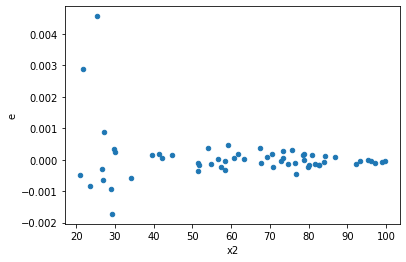

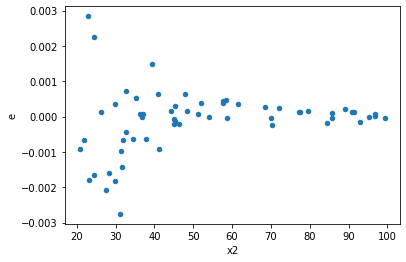

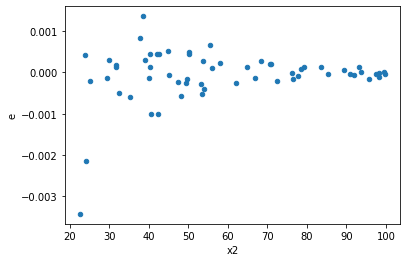

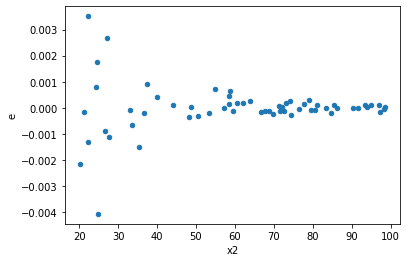

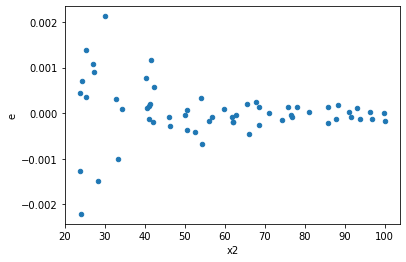

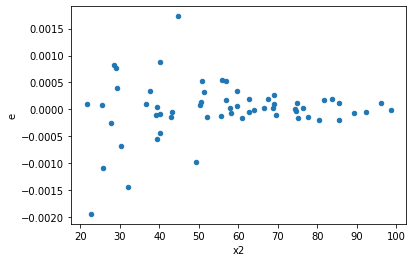

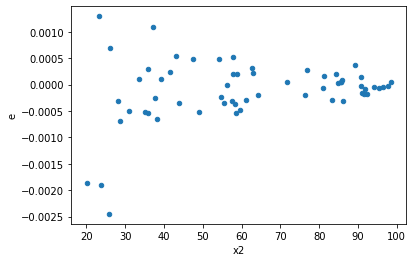

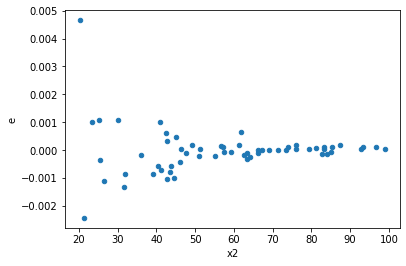

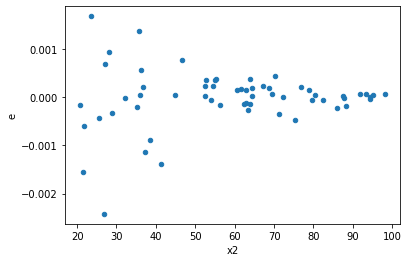

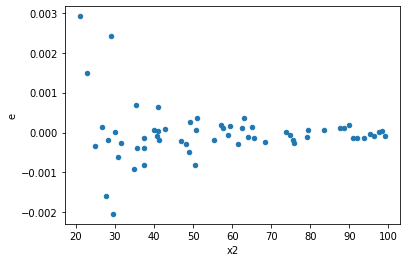

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,6.466804248783195e-07,3.143809203633076e-05,3.2334021243915975e-08,1.5719046018165379e-06,0.020569964110131015,4.751262172442117e-13,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,6.684909153988331e-07,4.0642384305795935e-05,3.3424545769941653e-08,2.0321192152897966e-06,0.016448122491265867,4.906097916485407e-14,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,2.897830308183841e-07,1.6294478889376383e-05,1.4489151540919204e-08,8.147239444688191e-07,0.01778412386095488,1.086251371383053e-13,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,3.973351498455722e-07,5.217144339164625e-05,1.986675749227861e-08,2.6085721695823123e-06,0.0076159508730248,1.787445161667665e-17,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,5.924485821315833e-07,1.9476405755877788e-05,2.9622429106579165e-08,9.738202877938894e-07,0.030418784120514027,2.404409536635929e-11,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,3.1925192189349666e-07,1.3054562842592993e-05,1.5962596094674834e-08,6.527281421296496e-07,0.024455198212526626,2.7174485525019425e-12,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,6.153961888394997e-07,1.46302970765927e-05,3.076980944197498e-08,7.31514853829635e-07,0.04206313690130627,5.829619778856955e-10,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1.8878324849410312e-07,3.579730136048041e-05,9.439162424705157e-09,1.7898650680240205e-06,0.005273672632276033,3.941747962882993e-19,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,6.567543773839428e-07,1.9110339028657207e-05,3.283771886919714e-08,9.555169514328603e-07,0.03436644302328161,8.047481766853097e-11,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64